# Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# Read Dataset and do Pre-processing

In [2]:
dataset = pd.read_csv(r"C:\Users\S.V.D.H.E.N.P\Downloads\spam.tsv",delimiter = '\t')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
ps = PorterStemmer()

In [6]:
review = dataset["v2"][0]
review

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
review = review.lower()
review

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [8]:
review = review.split()
review

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...']

In [9]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review

['go',
 'jurong',
 'point,',
 'crazy..',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'got',
 'amor',
 'wat...']

In [10]:
sw = stopwords.words("english")
'wat' in sw

False

In [11]:
dataset['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [12]:
corpus = " ".join(dataset['v2'])

In [13]:
corpus.split()

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'then',
 'say...',
 'Nah',
 'I',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 '�1.50',
 'to',
 'rcv',
 '

In [14]:
wc = WordCloud( background_color='white')
review_wordcloud = wc.generate(corpus)

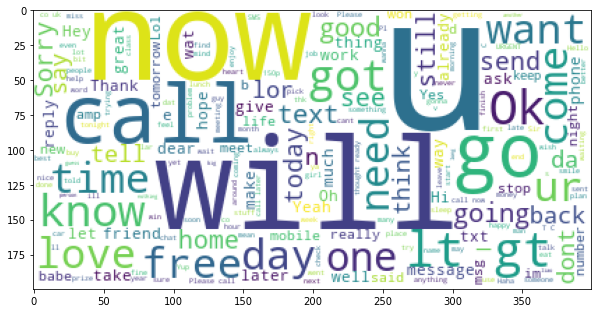

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(review_wordcloud)
plt.show()

In [16]:
word_count = {}
for word in corpus.split():
    if word in word_count:
        word_count[word] = word_count[word] + 1
    else:
        word_count[word] = 1

In [17]:
word_count

{'Go': 14,
 'until': 26,
 'jurong': 1,
 'point,': 1,
 'crazy..': 1,
 'Available': 3,
 'only': 147,
 'in': 798,
 'bugis': 4,
 'n': 137,
 'great': 75,
 'world': 17,
 'la': 2,
 'e': 71,
 'buffet...': 1,
 'Cine': 1,
 'there': 118,
 'got': 204,
 'amore': 1,
 'wat...': 12,
 'Ok': 97,
 'lar...': 18,
 'Joking': 1,
 'wif': 26,
 'u': 692,
 'oni...': 2,
 'Free': 39,
 'entry': 25,
 '2': 453,
 'a': 1327,
 'wkly': 10,
 'comp': 10,
 'to': 2134,
 'win': 38,
 'FA': 4,
 'Cup': 3,
 'final': 13,
 'tkts': 4,
 '21st': 3,
 'May': 16,
 '2005.': 3,
 'Text': 42,
 '87121': 4,
 'receive': 34,
 'question(std': 2,
 'txt': 75,
 "rate)T&C's": 2,
 'apply': 15,
 "08452810075over18's": 2,
 'U': 299,
 'dun': 46,
 'say': 72,
 'so': 294,
 'early': 24,
 'hor...': 2,
 'c': 44,
 'already': 45,
 'then': 146,
 'say...': 3,
 'Nah': 7,
 'I': 1466,
 "don't": 110,
 'think': 113,
 'he': 127,
 'goes': 26,
 'usf,': 2,
 'lives': 2,
 'around': 53,
 'here': 75,
 'though': 15,
 'FreeMsg': 5,
 'Hey': 76,
 'darling': 4,
 "it's": 53,
 'been'

In [18]:
top_15_word = pd.Series(corpus.split()).value_counts().head(15)
top_15_word

to      2134
you     1622
I       1466
a       1327
the     1197
and      857
in       798
is       781
i        742
u        692
for      644
my       628
of       591
your     560
me       557
dtype: int64

<AxesSubplot:>

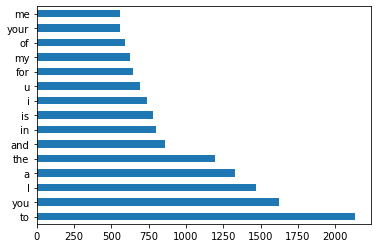

In [19]:
top_15_word.plot(kind = "barh")

In [20]:
pd.Series(corpus.split()).value_counts()

to        2134
you       1622
I         1466
a         1327
the       1197
          ... 
page.        1
DIDN'T       1
rupaul       1
TOOL!        1
Rofl.        1
Length: 15583, dtype: int64

In [21]:
pd.Series(corpus.split()).nunique()

15583

In [22]:
X = dataset.v2
Y = dataset.v1
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y = Y.reshape(-1,1)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
tokenizer = Tokenizer(num_words=2000,lower=True)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train=sequence.pad_sequences(sequences,maxlen=200)

# Create Model

In [24]:
model = Sequential()

# Add Layers(LSTM,Dense,Hidden-Layers,Output)

In [25]:
model.add(Embedding(2000,50,input_length=200))
model.add(LSTM(64))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [27]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])

# Fit the Model

In [28]:
model.fit(X_train,y_train,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
28/28 [==============================] - 12s 288ms/step - loss: 0.3235 - accuracy: 0.8788 - val_loss: 0.1148 - val_accuracy: 0.9787
Epoch 2/20
28/28 [==============================] - 7s 244ms/step - loss: 0.0901 - accuracy: 0.9784 - val_loss: 0.0502 - val_accuracy: 0.9854
Epoch 3/20
28/28 [==============================] - 7s 246ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 4/20
28/28 [==============================] - 7s 243ms/step - loss: 0.0238 - accuracy: 0.9935 - val_loss: 0.0375 - val_accuracy: 0.9888
Epoch 5/20
28/28 [==============================] - 7s 245ms/step - loss: 0.0162 - accuracy: 0.9958 - val_loss: 0.0439 - val_accuracy: 0.9922
Epoch 6/20
28/28 [==============================] - 7s 244ms/step - loss: 0.0146 - accuracy: 0.9961 - val_loss: 0.0316 - val_accuracy: 0.9933
Epoch 7/20
28/28 [==============================] - 7s 241ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0433 - val_accuracy: 0.9933
Epoch

# Save the Model

In [29]:
model.save("spam_classification.h5")

# Test the Model

In [30]:
max_len = 150
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = keras.utils.pad_sequences(test_sequences,maxlen=max_len)
acc = model.evaluate(test_sequences_matrix,y_test)

35/35 [==============================] - 1s 18ms/step - loss: 0.1179 - accuracy: 0.9839


In [31]:
def predict(message):
    t = tokenizer.texts_to_sequences(message)
    t = sequence.pad_sequences(t, maxlen=200)
    predicts = model.predict(t)
    if predicts > 0.5:
        print("Spam")
    else:
        print("Not Spam")

In [32]:
predict(["I HAVE A DATE ON SUNDAY WITH WILL!!"])

1/1 [==============================] - 0s 445ms/step
Not Spam


In [33]:
predict(["Your credits have been topped up for http://www.bubbletext.com Your renewal Pin is tgxxrz"])

1/1 [==============================] - 0s 31ms/step
Spam
